In [2]:
import cv2
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
import os
print(os.getcwd())

C:\Users\Osama\Desktop\Template Dicom


In [4]:
base_path = os.getcwd()
templatePath = os.path.join(base_path,'template.jpg')
print(templatePath)
template = cv2.imread(templatePath)

C:\Users\Osama\Desktop\Template Dicom\template.jpg


In [5]:
img_dir = r"C:\Users\Osama\Desktop\Template Dicom" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*.jpg')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = plt.imread(f1)
    data.append(img)

In [6]:
print(data)

[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,

In [7]:
X = []
Y = []
W = []
H = []

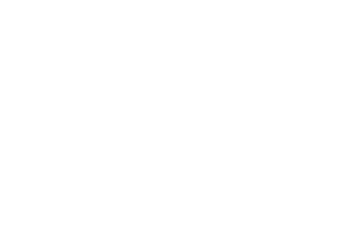

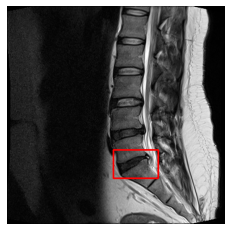

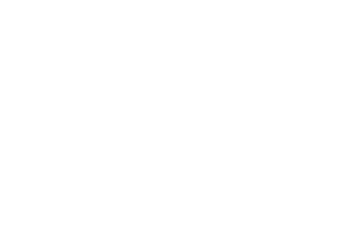

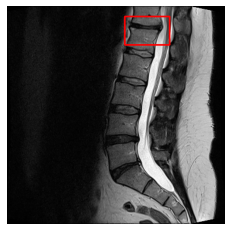

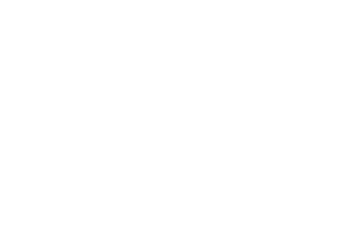

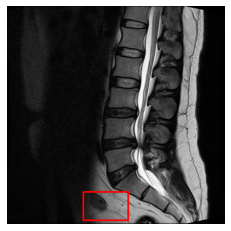

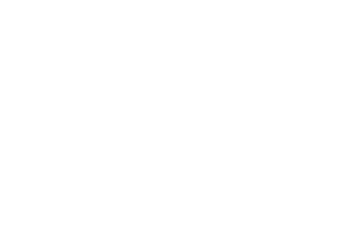

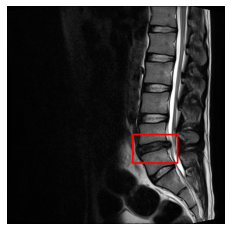

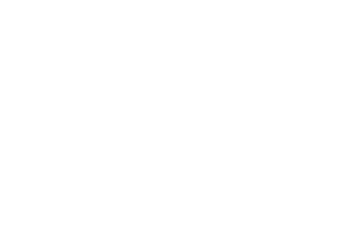

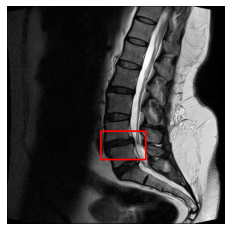

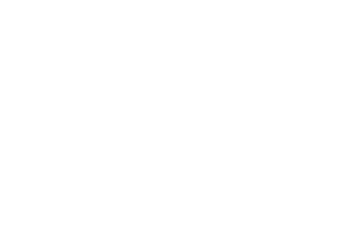

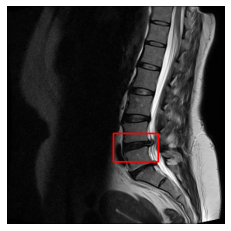

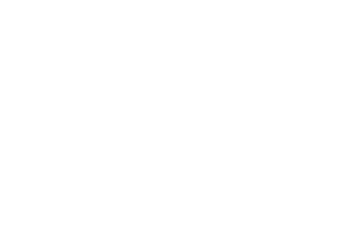

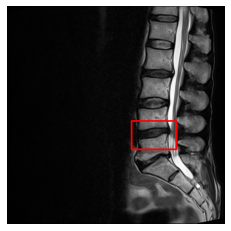

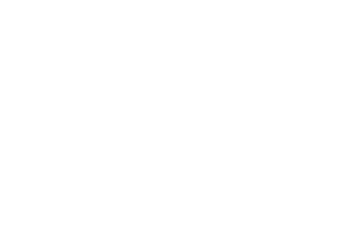

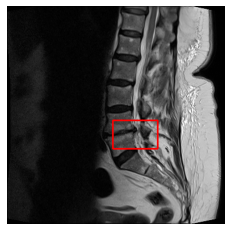

In [8]:
for i in range(8):
    main_img = data[i] 
    #print(main_img.shape)

    #open the template as gray scale image
    template = cv2.imread(templatePath)
    size= template.shape #get the width and height
    #print(size)
    #main_gray_image == main_img

    main_gray_image = cv2.cvtColor(main_img, cv2.COLOR_BGR2GRAY)
    template_gray_image = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    plt.figure()
    plt.axis("off")
#plt.imshow(test_image_gray),plt.show()
#plt.imshow(cv2.cvtColor(base_img, cv2.COLOR_BGR2GRAY)),plt.show()

# Displaying the grayscale image
#plt.imshow(main_gray_image, cmap='gray')

# It is very important to convert images to numpyarray in python before processing using 
# img_numpy = np.uint8(base_img)  
# we have already images in true format     <type 'numpy.ndarray'>
#img_numpy = np.array(main_gray_image)
#template_numpy = np.array(template_gray_image)

    img_numpy = main_gray_image
    template_numpy = template_gray_image

#width, height = template.shape[::-1] #get the width and height  # not working with colored image)
    width, height = template_gray_image.shape[::-1] #get the width and height  # not working with colored image
    #print(width)
    #print(height)

    import random

# All the 6 correlation methods for comparison in a list
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# choose a method randomly
    #print(eval(random.choice(methods)))

#match the template using cv2.matchTemplate
    copied_img = main_img
    match_region = cv2.matchTemplate(main_gray_image ,template_numpy , cv2.TM_SQDIFF_NORMED)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match_region)

#draw the rectangle using top-left and bottom-right corner around the matched template
    top_left = min_loc
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    #X.append(top_left)
    #Y.append(bottom_right)
    X.append(top_left[0])
    Y.append(top_left[1])
    W.append(width)
    H.append(height)

#blue color vector(255,0,0) ; thickness=2
    cv2.rectangle(copied_img,top_left, bottom_right,  (0,0,255), 2)

#show image 
    plt.figure()
    plt.axis("off")
    plt.imshow(cv2.cvtColor(copied_img, cv2.COLOR_BGR2RGB)),plt.show()
    

In [16]:
# 3,4,6

## DATAFRAME CREATED

In [17]:
df = pd.DataFrame(list(zip(X,Y,W,H)), 
               columns =['X','Y','W','H'])

In [18]:
df

,X,Y,W,H
0,149,203,58,47
1,120,186,58,47
2,85,85,58,47
3,80,138,58,47
4,68,218,58,47
5,119,120,58,47
6,215,156,58,47
7,143,176,58,47
8,49,225,58,47
9,167,153,58,47


In [19]:
df.to_csv('Pred_Val.csv',index=False)

In [20]:
pred = pd.read_csv('Pred_Val.csv')
actual = pd.read_csv('True_Val.csv')

In [21]:
a = []
for i,j in zip(pred.index,actual.index):
    if (((pred.iloc[i,0] in range(actual.iloc[i,0],actual.iloc[i,0]+7)) and (pred.iloc[i,1] in range(actual.iloc[i,1],actual.iloc[i,1]+7)))):
        a.append(1)
    else:
        a.append(0)

In [22]:
print(a)

[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]


## CONFUSION MATRIX (Manually)

In [23]:
accu = sum(a)
detected_images = sum(a)
total_Images = len(data) -1
Accuracy = (accu/total_Images)*100
True_Positive = sum(a) #Pattern detected at correct place
True_Negative = 0      # Zero because our method will detect something no matter it will be present or not
False_Positive = total_Images - sum(a) #Detected but at wrong place
False_Negative = 0 # Logo exist & our method will detect something

In [24]:
print('Total Images = ',total_Images)
print('Detected Images = ',detected_images)
print('Accuracy = ',Accuracy)

Total Images =  10
Detected Images =  3
Accuracy =  30.0


In [28]:
Confusion_Matrix = ([True_Positive,False_Positive],[False_Negative,True_Negative])

In [29]:
print(Confusion_Matrix)

([3, 7], [0, 0])


In [30]:
print("True_Positive  = ",True_Positive)
print("True_Negative  = ",True_Negative)
print("False_Positive = ",False_Positive)
print("False_Negative = ",False_Negative)

True_Positive  =  3
True_Negative  =  0
False_Positive =  7
False_Negative =  0


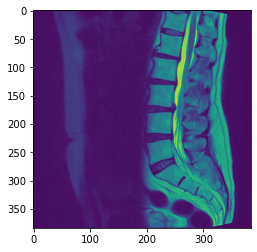

In [15]:
plt.imshow(data[8])